In [1]:
import recirq
import ipywidgets

import cirq

from recirq import fermi_hubbard
from recirq.fermi_hubbard import publication

# Hide numpy warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
"""Get all layouts for 8 sites on a 23-qubit subgrid of the Google Rainbow processor."""
layouts = publication.rainbow23_layouts(sites_count=8)
print(f"There are {len(layouts)} total qubit layouts.")

There are 16 total qubit layouts.


In [3]:
"""Display an example layout."""
print(layouts[0].text_diagram())

1↓ q(4, 1)━━━1↑ q(4, 2)
│            │
│            │
2↓ q(5, 1)━━━2↑ q(5, 2)───3↑ q(5, 3)
│                         │
│                         │
3↓ q(6, 1)───4↓ q(6, 2)━━━4↑ q(6, 3)───5↑ q(6, 4)
             │                         │
             │                         │
             5↓ q(7, 2)───6↓ q(7, 3)━━━6↑ q(7, 4)───7↑ q(7, 5)
                          │                         │
                          │                         │
                          7↓ q(8, 3)───8↓ q(8, 4)━━━8↑ q(8, 5)


In [4]:
"""Get FermiHubbardParameters (problem descriptions) for each qubit layout with the above parameters."""
parameters = [
    publication.trapping_instance(
        layout, u=2, dt=0.3, up_particles=2, down_particles=2
    ) 
    for layout in layouts
]

In [5]:
"""Display the Hamiltonian for an example problem description."""
parameters_example = parameters[0]
print(parameters_example.hamiltonian)

Hamiltonian(sites_count=8, j=1.0, u=2, v=0, local_charge=0, local_spin=0, mu_up=0, mu_down=0)


In [6]:
parameters_example.initial_state

IndependentChainsInitialState(up=GaussianTrappingPotential(particles=2, center=0.5, sigma=0.14285714285714285, scale=-4), down=UniformTrappingPotential(particles=2))

In [7]:
parameters_example.dt

0.3

In [8]:
"""Create circuits from a problem description."""
initial, trotter, measurement = fermi_hubbard.create_circuits(parameters_example, trotter_steps=1)

In [9]:
"""Display the total circuit to execute."""
circuit = initial + trotter + measurement
circuit

┌────────────────────────────────────────┐         ┌────────────────────────────────────────┐         ┌─────────────────────────────────────────┐         ┌──────────────────────────────────────────┐         ┌────────────────────────────────────────┐         ┌─────────────────────────────────────────┐         ┌─────────────────────────────────────────┐         ┌──────────────────────────────────┐                ┌────────────────────────────┐                ┌────────────────────────────────┐
(4, 1): ───X───────────────────────────────────────────────────────────────────────────PhISwap(0.25)───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────FSim(-0.0955π, 0)────CPhaseEcho────────────────────────────────────@─────────────────────────────────────────────────────M────────
                                                                                       │                                                                                                                                                                                                                                                                                                                   │                                                                  │                                                     │
(4, 2): ───X───────────────────────────────────────────────────────PhISwap(0.25)───────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────FSim(-0.0955π, 0)┼────────────────────CPhaseEcho────────────────────────────────────@^-0.191──────────────────────────────────────────────M('z')───
                                                                   │                   │                                                                                                                                                                                                                                                                                                  │                │                                                                                                                        │
(5, 1): ───X────────────────────────PhISwap(0.25)──────────────────┼───────────────────PhISwap(0.25)^-0.816────Z^0────────────────────────PhISwap(0.25)───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼────────────────FSim(-0.0955π, 0)────@───────────────────────────FSim(-0.5π, 0)────@─────────────────────────────FSim(-0.595π, 0)────Z───M────────
                                    │                              │                                                                      │                                                                                                                                                                                                                                               │                                     │                           │                 │                             │                       │
(5, 2): ───X────PhISwap(0.25)───────┼──────────────────────────────PhISwap(0.25)^-0.988────────────────────────Z^0────PhISwap(0.25)───────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [10]:
"""Convert the circuit to native hardware gates perfectly (without noise)."""
publication.ideal_sqrt_iswap_converter().convert(circuit)

┌────────────────────┐             ┌────────────────────┐          ┌────────────────────┐             ┌────────────────────┐          ┌────────────────────┐             ┌────────────────────┐          ┌────────────────────┐               ┌────────────────────┐          ┌────────────────────┐              ┌────────────────────┐          ┌────────────────────┐               ┌────────────────────┐       ┌────────────────────┐               ┌────────────────────┐             ┌────────────────────┐             ┌────────────────────┐                                                                                                ┌────────────────────┐       ┌────────────────────┐                                                                                                  ┌────────────────────┐             ┌────────────────────┐
(4, 1): ───X──────────────────────────────────────────────────────────────────────S^-1──────────────iSwap─────────Z^0.592──────────────iSwap────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────T^-1─────────────────iSwap─────────Z^0.095──────────────iSwap──────────────────────────────────────────────PhX(0.25)──────────────────────PhX(0.25)──────────────────────────────────────────────────────────────────────PhX(0.25)^0.0483───T^-1───iSwap────────Rx(-0.136π)───Z───iSwap────────Rx(-0.048π)──────────────────────────────────────────────────────────────────────────M────────
                                                                                                    │                                  │                                                                                                                                                                                                                                                                                                                                                                                     │                                  │                                                                                                                                                                                          │                              │                                                                                                 │
(4, 2): ───X──────────────────────────────────────────────────────────────────────S^-1────iSwap─────┼─────────────Z^0.506────iSwap─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────T^-1───────iSwap─────┼─────────────Z^0.095────iSwap─────┼──────────────────────────────────────────────────PhX(0.25)──────────────────────PhX(0.25)──────────────────────────────────────────────────────────────────────PhX(0.25)^0.5──────T^-1───iSwap^-0.5─────────────────────iSwap^-0.5───Rx(-0.5π)────────────────────────────────────────────────────────────────────────────M('z')───
                                                                                          │         │                        │         │                                                                                                                                                                                                                                                                                                                                                                           │         │                        │         │                 

In [11]:
"""Set the number of Trotter steps to simulate."""
trotter_steps = range(10 + 1)

In [12]:
"""Get an ideal sampler to simulate experiments."""
ideal_sampler = fermi_hubbard.ConvertingSampler(
    cirq.Simulator(), publication.ideal_sqrt_iswap_converter().convert
)

In [13]:
"""Run the experiments on a perfect simulator for each qubit layout."""
from tqdm.notebook import tqdm

with tqdm(range(len(parameters) * len(trotter_steps))) as progress:
    experiments = [
        fermi_hubbard.run_experiment(
            params, 
            trotter_steps, 
            ideal_sampler, 
            post_run_func=lambda *_: progress.update()
        )
        for params in parameters
    ]

  0%|          | 0/176 [00:00<?, ?it/s]

In [14]:
"""Post-process the experimental data for all qubit layouts."""
bundle = fermi_hubbard.InstanceBundle(experiments)
bundle.cache_exact_numerics()

In [15]:
"""Show quantities which can be accessed from an InstanceBundle."""
for quantity_name in bundle.quantities:
    print(quantity_name)

up_down_density
up_down_position_average
up_down_position_average_dt
up_down_spreading
up_down_spreading_dt
charge_spin_density
charge_spin_position_average
charge_spin_position_average_dt
charge_spin_spreading
charge_spin_spreading_dt
up_down_density_norescale
up_down_position_average_norescale
up_down_position_average_dt_norescale
up_down_spreading_norescale
up_down_spreading_dt_norescale
charge_spin_density_norescale
charge_spin_position_average_norescale
charge_spin_position_average_dt_norescale
charge_spin_spreading_norescale
charge_spin_spreading_dt_norescale
scaling
post_selection


In [16]:
"""Example of getting a DataFrame from a quantity."""
charge_spin_density, _, _ = fermi_hubbard.quantity_data_frame(bundle, "charge_spin_density")
charge_spin_density.head()

,u,chain,step,time,site,value,std_error,std_dev
0,2,0,0,0.0,1,0.119269,0.000677,0.002706
1,2,0,0,0.0,2,0.328056,0.000612,0.002446
2,2,0,0,0.0,3,0.519936,0.001250,0.004999
3,2,0,0,0.0,4,1.031639,0.001097,0.004386
4,2,0,0,0.0,5,1.032817,0.001078,0.004311


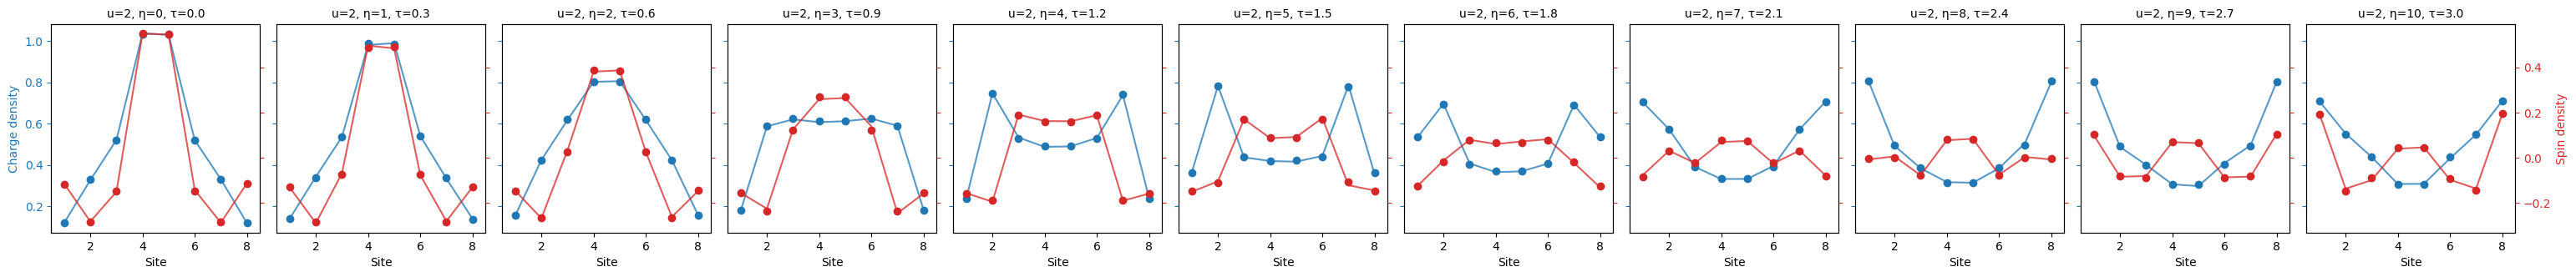

In [17]:
"""Plot the charge spin density."""
fermi_hubbard.plot_quantity(bundle, "charge_spin_density");

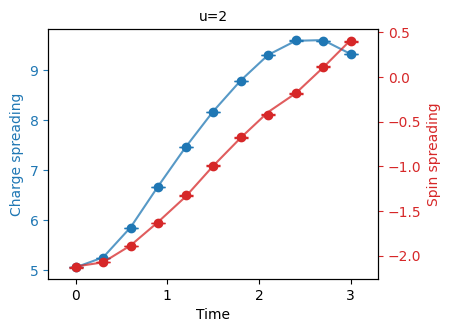

In [24]:
"""Plot the charge spin spreading."""
fermi_hubbard.plot_quantity(bundle, "charge_spin_spreading", show_std_error=True);

In [22]:
"""Get an engine sampler."""
import os
import cirq_google

if "GOOGLE_CLOUD_PROJECT" in os.environ:
    engine_sampler = cirq_google.get_engine_sampler(
        processor_id="rainbow", gate_set_name="sqrt_iswap"
    )
else:
    # Use the simulator as a backup.
    engine_sampler = cirq.Simulator()

# Get a sampler for the Fermi-Hubbard experiment.
google_sampler = fermi_hubbard.ConvertingSampler(
    engine_sampler, publication.google_sqrt_iswap_converter().convert
)

In [23]:
"""Run the experiments on Google's QCS and save the results."""
# Directory to save results in.
results_dir = "trapping"

with tqdm(range(len(layouts) * len(trotter_steps))) as progress:
    for index, params in enumerate(parameters):
        experiment = fermi_hubbard.run_experiment(
            params, 
            trotter_steps, 
            google_sampler, 
            post_run_func=lambda *_: progress.update()
        )

        fermi_hubbard.save_experiment(
            experiment, f"{results_dir}/trapping_{index + 1}.json"
        )

  0%|          | 0/176 [00:00<?, ?it/s]

In [25]:
"""Load experimental results."""
experiments = [
    fermi_hubbard.load_experiment(f"{results_dir}/trapping_{index + 1}.json") 
    for index in range(len(parameters))
]

In [26]:
"""Post-process the experimental data for all qubit layouts."""
bundle = fermi_hubbard.InstanceBundle(
    experiments,numerics_transform=publication.parasitic_cphase_compensation(0.138)
)
bundle.cache_exact_numerics()

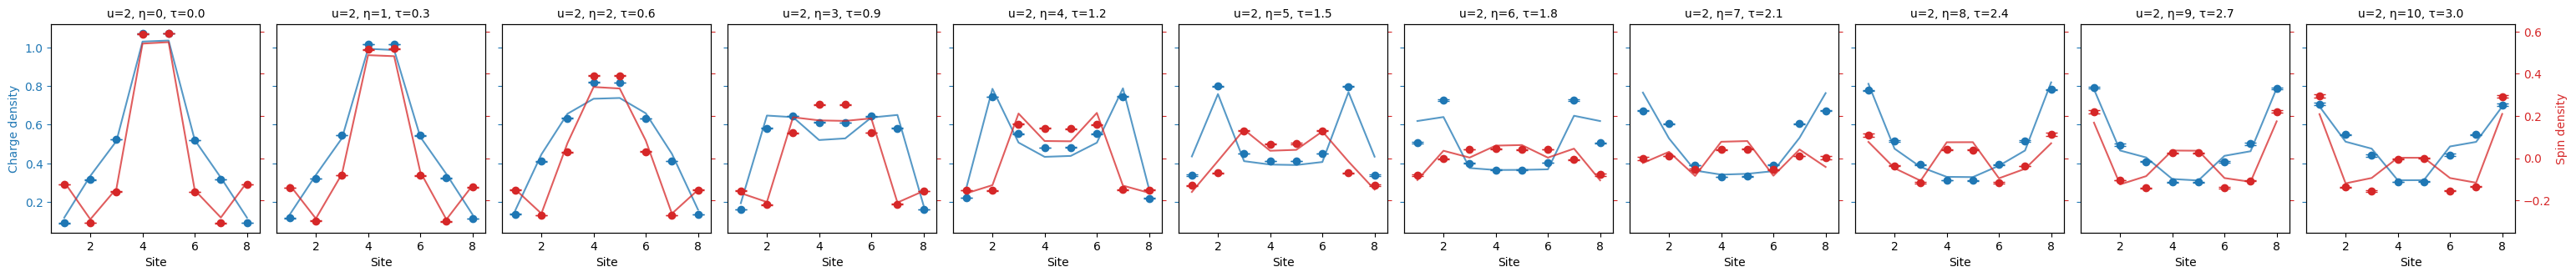

In [27]:
"""Plot the charge spin density."""
fermi_hubbard.plot_quantity(bundle, "charge_spin_density", show_std_error=True);

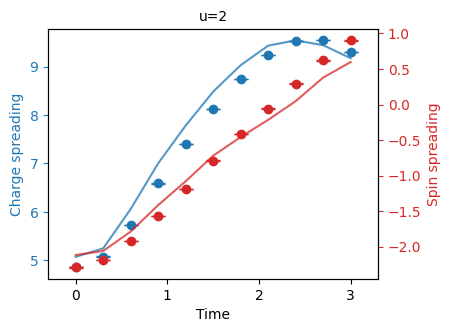

In [28]:
"""Plot the charge spin spreading."""
fermi_hubbard.plot_quantity(bundle, "charge_spin_spreading", show_std_error=True);